# Pre-processing

In [436]:
import pandas

# Utilities
from enum import Enum

class Feature(Enum):
    PASSENGER_ID = "PassengerId"
    NAME = "Name"
    SEX = "Sex"
    AGE = "Age"
    PCLASS = "Pclass"
    SIBSP = "SibSP"
    PARCH = "Parch"
    TICKET = "Ticket"
    FARE = "Fare"
    CABIN = "Cabin"
    EMBARKED = "Embarked"
    SURVIVED = "Survived"

raw_data = pandas.read_csv('../../datasets/raw/titanic.csv', index_col=Feature.PASSENGER_ID.PASSENGER_ID.value)

samples = len(raw_data)
columns = raw_data.columns
total_survived = sum(raw_data['Survived'])

print(f"Samples: {samples}")
print(f"Survived: {total_survived}")
print("""Columns:  
    PassengerId: a number that identifies each passenger, from 1 to 891
    Name: the full name of the passenger
    Sex: the gender of the passenger (male or female)
    Age: the age of the passenger as an integer
    Pclass: the class in which the passenger was traveling: first, second, or third
    SibSP: the number of siblings and spouse of the passenger (0 if the passenger is traveling alone)
    Parch: the number of parents and children of the passenger (0 if the passenger is traveling alone)
    Ticket: the ticket number
    Fare: the fare the passenger paid in British pounds
    Cabin: the cabin in which the passenger was traveling
    Embarked: the port in which the passenger embarked: “C” for Cherbourg, “Q” for Queenstown, and “S” for Southampton
    Survived: information whether the passenger survived (1) or not (0)""")
print("\n")


raw_data.info()
raw_data.describe()

Samples: 891
Survived: 342
Columns:  
    PassengerId: a number that identifies each passenger, from 1 to 891
    Name: the full name of the passenger
    Sex: the gender of the passenger (male or female)
    Age: the age of the passenger as an integer
    Pclass: the class in which the passenger was traveling: first, second, or third
    SibSP: the number of siblings and spouse of the passenger (0 if the passenger is traveling alone)
    Parch: the number of parents and children of the passenger (0 if the passenger is traveling alone)
    Ticket: the ticket number
    Fare: the fare the passenger paid in British pounds
    Cabin: the cabin in which the passenger was traveling
    Embarked: the port in which the passenger embarked: “C” for Cherbourg, “Q” for Queenstown, and “S” for Southampton
    Survived: information whether the passenger survived (1) or not (0)


<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Nu

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [437]:
# 1. Missing Values

raw_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [438]:
# 1.1 Dropping columns with missing data

# When a column is missing too many values, the corresponding feature may not be useful to our model. 
# In this case, Cabin does not look like a good feature. Out of 891 rows, 687 don’t have a value.
# The axis parameter, which is 1 when we want to drop a column and 0 when we want to drop a row

clean_data = raw_data.drop(Feature.CABIN.value, axis=1)
clean_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [439]:
# 1.2 How to not lose the entire column: Filling in missing data

from sklearn.impute import SimpleImputer

mediana_imputer = SimpleImputer(strategy="median")
clean_data[Feature.AGE.value] = mediana_imputer.fit_transform(clean_data[[Feature.AGE.value]])

# or can use simple way
median_age = clean_data[Feature.AGE.value].median()
clean_data[Feature.AGE.value] = clean_data[Feature.AGE.value].fillna(median_age)

clean_data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [440]:
# Missing categorical values

clean_data[Feature.EMBARKED.value] = clean_data[Feature.EMBARKED.value].fillna('U')

clean_data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [441]:
clean_data.to_csv("../../datasets/processed/titanic/clean_data.csv")

In [442]:
# 2. Feature engineering: Transforming the features in our dataset before training the models
# Machine learning models take numbers as input

# Turning categorical data into numerical data: One-hot encoding

data = pandas.read_csv('../../datasets/processed/titanic/clean_data.csv')

gender_columns = pandas.get_dummies(data[Feature.SEX.value], prefix=Feature.SEX.value)
embarked_columns = pandas.get_dummies(data[Feature.EMBARKED.value], prefix=Feature.EMBARKED.value)

preprocessed_data = pandas.concat([data, gender_columns], axis=1)
preprocessed_data = pandas.concat([preprocessed_data, embarked_columns], axis=1)


preprocessed_data = preprocessed_data.drop([Feature.SEX.value, Feature.EMBARKED.value], axis=1)

preprocessed_data.info()

# Sometimes this process can be expensive. Imagine having a column with 500 classes. That will add 500 new columns to our table! Not only that, but the rows will be very sparse, namely, they will contain mostly zeroes. Now imagine if we had many columns with hundreds of classes each—our table would become too big to handle. In this case, as a data scientist, use your criteria to make a decision. If there is enough computing power and storage space to handle thousands or perhaps millions of columns, then one-hot encoding is no problem. If these resources are limited, perhaps we can broaden our classes to produce fewer columns. For example, if we had a column with 100 animal types, we can lump them into six columns formed by mammals, birds, fish, amphibians, invertebrates, and reptiles.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Sex_female   891 non-null    bool   
 10  Sex_male     891 non-null    bool   
 11  Embarked_C   891 non-null    bool   
 12  Embarked_Q   891 non-null    bool   
 13  Embarked_S   891 non-null    bool   
 14  Embarked_U   891 non-null    bool   
dtypes: bool(6), float64(2), int64(5), object(2)
memory usage: 68.0+ KB


In [443]:
pclass_columns = pandas.get_dummies(data[Feature.PCLASS.value], prefix=Feature.PCLASS.value)

          Survived    Pclass
Survived  1.000000 -0.338481
Pclass   -0.338481  1.000000


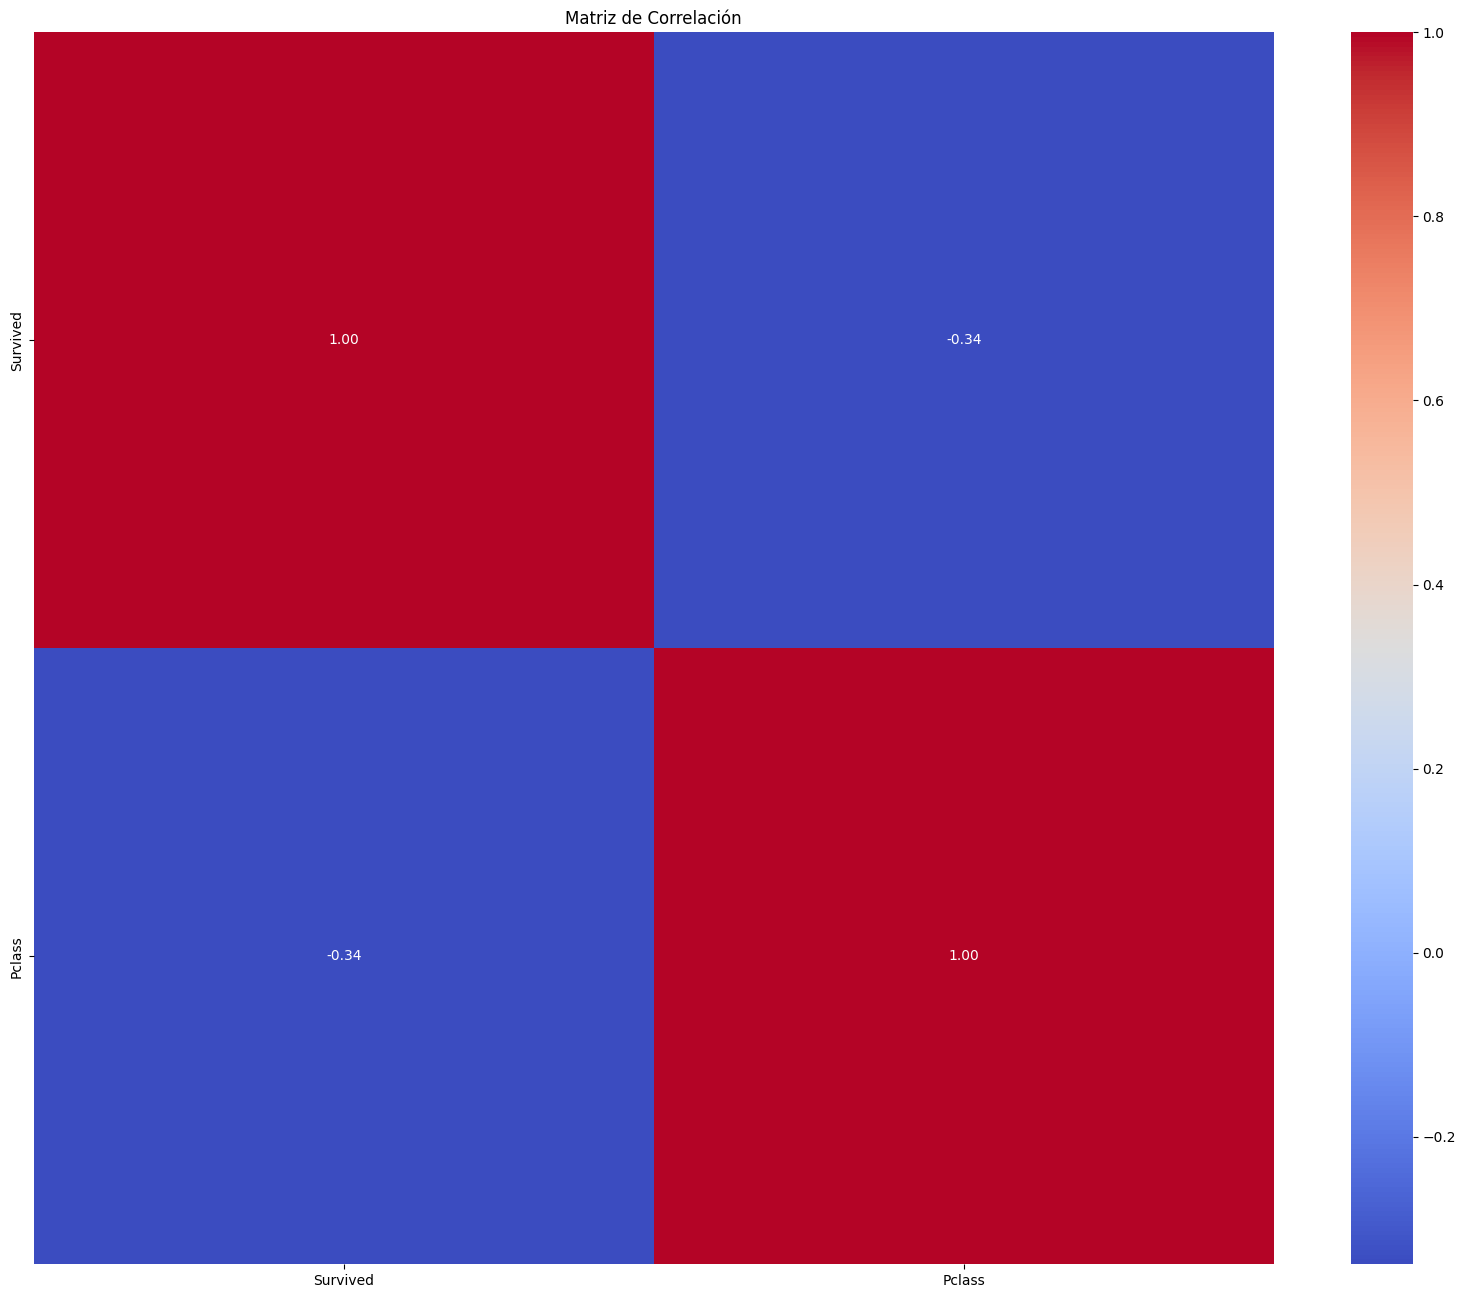

In [444]:
# Can we one-hot encode numerical features? If so, why would we want to?

# Let’s look, for example, at the Pclass column. This column has the classes 0, 1, and 2, for first, second, and third class. 
# Should we keep it as a numerical feature, or should we one-hot encode it as three features, Pclass1, Pclass2, and Pclass3? 

# There is a rule of thumb that we can use to decide whether to split a column into several columns. 
# We can ask ourselves: is this feature directly correlated to the outcome? In other words, 
# does increasing the value of the feature make it more likely (or less likely) for a passenger to survive? 
# One would imagine that perhaps the higher the class, the more likely a passenger survived.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = data.copy()[[Feature.SURVIVED.value, Feature.PCLASS.value]]

# Find correlation between variables
# Correlation is a statistical measure that indicates how strongly and in what direction two variables are related.
# If one variable increases and the other also increases, we say there is a positive correlation.
# If one variable increases and the other decreases, we speak of a negative correlation.
# If there is no clear pattern, the correlation is close to 0 (no linear relationship).
corr = data.corr()
print(corr)

# HitMap
plt.figure(figsize=(20,16))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


In [445]:

# There is not correlation so we can convert to dummy

pclass_columns = pandas.get_dummies(preprocessed_data[Feature.PCLASS.value], prefix=Feature.PCLASS.value)

preprocessed_data = pandas.concat([preprocessed_data, pclass_columns], axis=1)

preprocessed_data = preprocessed_data.drop([Feature.PCLASS.value], axis=1)

preprocessed_data.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,False,False,True,False,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,True,False,False,False,True,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,False,False,True,False,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,False,False,True,False,True,False,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,False,False,True,False,False,False,True


In [446]:
# Turning numerical data into categorical data (and why would we want to do this?): Binning

# However, is this always the case? What if the relationship between age and survival is not as straightforward? 
# What if the highest possibility of survival is when the passenger is between 20 and 30, and it’s low for all other age groups. 
# What if the lowest possibility of survival is between 20 and 30? 
# We need to give the model all the freedom to determine which ages determine whether a passenger is more or less likely to survive.
#  What can we do?

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
categorized_age = pandas.cut(preprocessed_data[Feature.AGE.value], bins)
categorized_age

preprocessed_data[Feature.AGE.value] = categorized_age

# Conversión a códigos numéricos: Si tus rangos son el resultado de la función pd.cut() y tienen un tipo category, puedes convertirlos a códigos numéricos enteros usando el atributo .cat.codes.
# Este método es útil si los rangos tienen un orden natural (por ejemplo, "bajo", "medio", "alto") y no quieres crear múltiples columnas.
#df[Feature.AGE.value] = df[Feature.AGE.value].cat.codes

# Codificación One-Hot (Dummy variables): Si los rangos son categorías nominales sin un orden específico, 
# es mejor convertirlos en variables dummy. Por ejemplo, un rango de edad [0-10] se convertiría en una nueva columna, 
# y cada fila que caiga en ese rango tendría un 1 en esa columna y 0 en las demás. 
# Puedes hacerlo con la función pd.get_dummies().
preprocessed_data = pd.get_dummies(preprocessed_data, columns=[Feature.AGE.value], drop_first=True)


preprocessed_data.head()


,PassengerId,Survived,Name,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,...,Pclass_1,Pclass_2,Pclass_3,"Age_(10, 20]","Age_(20, 30]","Age_(30, 40]","Age_(40, 50]","Age_(50, 60]","Age_(60, 70]","Age_(70, 80]"
0,1,0,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,False,True,False,...,False,False,True,False,True,False,False,False,False,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,True,False,True,...,True,False,False,False,False,True,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,True,False,False,...,False,False,True,False,True,False,False,False,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,True,False,False,...,True,False,False,False,False,True,False,False,False,False
4,5,0,"Allen, Mr. William Henry",0,0,373450,8.0500,False,True,False,...,False,False,True,False,False,True,False,False,False,False


In [447]:
# Feature selection: Getting rid of unnecessary features
preprocessed_data = preprocessed_data.drop([Feature.PASSENGER_ID.value, Feature.NAME.value, Feature.TICKET.value], axis=1, errors='ignore')
preprocessed_data.head()

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Pclass_1,Pclass_2,Pclass_3,"Age_(10, 20]","Age_(20, 30]","Age_(30, 40]","Age_(40, 50]","Age_(50, 60]","Age_(60, 70]","Age_(70, 80]"
0,0,1,0,7.2500,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False
1,1,1,0,71.2833,True,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False
2,1,0,0,7.9250,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False
3,1,1,0,53.1000,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
4,0,0,0,8.0500,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False


In [448]:
preprocessed_data.to_csv("../../datasets/processed/titanic/preprocessed_titanic_data.csv")

In [449]:
# Split the data in training, validation and, test sets
#  
from sklearn.model_selection import train_test_split

features = preprocessed_data.drop(["Survived"], axis=1)
labels = preprocessed_data["Survived"]

features_train, features_validation_test, labels_train, labels_validation_test = train_test_split(features, labels, test_size=0.4)

features_validation, features_test, labels_validation, labels_test = train_test_split(features_validation_test, labels_validation_test, test_size=0.5)

print(len(features_train))
print(len(features_validation))
print(len(features_test))
print(len(labels_train))
print(len(labels_validation))
print(len(labels_test))


534
178
179
534
178
179


In [451]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Asegúrate de que features_train, labels_train, features_test, labels_test estén definidos
# y contengan tus datos de entrenamiento y prueba.

# Definir un diccionario con los modelos
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC()
}

# Crear una lista para almacenar los resultados de cada modelo
results = []

# Iterar a través del diccionario
for name, model in models.items():
    print(f"Entrenando el modelo: {name}...")
    model.fit(features_train, labels_train)
    
    # Hacer predicciones en el conjunto de prueba
    predictions = model.predict(features_test)
    
    # Calcular métricas de evaluación
    accuracy = accuracy_score(labels_test, predictions)
    f1 = f1_score(labels_test, predictions, average='weighted')
    precision = precision_score(labels_test, predictions, average='weighted')
    recall = recall_score(labels_test, predictions, average='weighted')
    
    # Almacenar las métricas en un diccionario
    model_metrics = {
        "Model": name,
        "Accuracy": accuracy,
        "F1-Score": f1,
        "Precision": precision,
        "Recall": recall
    }
    
    # Agregar el diccionario a la lista de resultados
    results.append(model_metrics)

# Crear un DataFrame de Pandas a partir de la lista de resultados
results_df = pd.DataFrame(results)

# Establecer la columna 'Model' como el índice
results_df.set_index('Model', inplace=True)

# Opcional: Ordenar el DataFrame por una métrica, por ejemplo, Accuracy
results_df_sorted = results_df.sort_values(by="Accuracy", ascending=False)

# Imprimir la tabla comparativa
print("\n--- Tabla Comparativa de Modelos ---")
print(results_df_sorted.round(4))
print("-" * 40)

Entrenando el modelo: Logistic Regression...
Entrenando el modelo: Decision Tree...
Entrenando el modelo: Random Forest...
Entrenando el modelo: Gradient Boosting...
Entrenando el modelo: AdaBoost...


c:\Users\luis.bolanoss\Documents\Labs\repositories\labs_machine_learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Entrenando el modelo: Gaussian Naive Bayes...
Entrenando el modelo: Support Vector Machine...

--- Tabla Comparativa de Modelos ---
                        Accuracy  F1-Score  Precision  Recall
Model                                                        
Gradient Boosting         0.8045    0.7991     0.8097  0.8045
AdaBoost                  0.7989    0.7929     0.8048  0.7989
Logistic Regression       0.7989    0.7929     0.8048  0.7989
Random Forest             0.7821    0.7814     0.7811  0.7821
Decision Tree             0.7542    0.7509     0.7525  0.7542
Gaussian Naive Bayes      0.7263    0.6935     0.7777  0.7263
Support Vector Machine    0.6536    0.6027     0.6778  0.6536
----------------------------------------
